# EXPLORATORY DATA ANALYSIS ON VIDEO GAMES SALES

## INTRODUCTION

Exploratory analysis carried out on video games sales from the year 1980 until 2020. The dataset has 11 columns which are Index, Rank, Video game name, Gaming platform, Year of release, Genre, Publisher, European sales, Global sales,Japan sales and sales from Other countries. There are 16598 rows in total. The dataset includes giants in the gaming wall. The aim of this analysis is to see what Genre is the most popular among gamers and one platform is the most popular to publish on. The insights from the analysis will enable a game start-up firm launch a product that would sell.

## DATASET DESCRIPTION

This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Fields include

> - **Rank**: Ranking of overall sales
> - **Name**: The games name
> - **Platform**: Platform of the games release (i.e. PC,PS4, etc.)
> - **Year**: Year of the game's release
> -**Genre**: Genre of the game
> -**Publisher**: Publisher of the game
> -**NA_Sales**: Sales in North America (in millions)
> -**EU_Sales**: Sales in Europe (in millions)
> -**JP_Sales**: Sales in Japan (in millions)
> -**Other_Sales**: Sales in the rest of the world (in millions)
> -**Global_Sales**: Total worldwide sales.

The script to scrape the data is available at https://github.com/GregorUT/vgchartzScrape.
It is based on BeautifulSoup using Python.
There are 16,598 records. 2 records were dropped due to incomplete information.

#### LOAD PYTHON LIBRARIES

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set_style('darkgrid')

## DATA PREPARATION AND CLEANING
#### LOAD VIDEO GAMES DATASET
**The video games sales dataset can be found at this link**:[here](https://www.kaggle.com/gregorut/videogamesales)


In [100]:
#show the head of the dataset
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [101]:
#dataset shape
df.shape

(16598, 11)

In [102]:
#dataset type
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [103]:
#column names
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [104]:
#dataset summary
df.describe(include='all')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598,16598,16327.000000,16598,16540,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
unique,NaN,11493,31,NaN,12,578,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2163,NaN,3316,1351,NaN,NaN,NaN,NaN,NaN
mean,8300.605254,NaN,NaN,2006.406443,NaN,NaN,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,NaN,NaN,5.828981,NaN,NaN,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.470000


In [105]:
#check for missing values
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [106]:
#drop missing values
df = df.dropna()
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [107]:
#check if missing values have been removed
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [108]:
#count number of entries in each column
df.count()  

Rank            16291
Name            16291
Platform        16291
Year            16291
Genre           16291
Publisher       16291
NA_Sales        16291
EU_Sales        16291
JP_Sales        16291
Other_Sales     16291
Global_Sales    16291
dtype: int64

In [109]:
#check for duplicates
df.duplicated().any()

False

In [110]:
#convert year column from float to integers
df.Year = df.Year.astype(int)
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Exploratory Analysis and Visualization

**The dataset is analyzed by showing the numeric relationship between columns in the dataset. These visualization include bar charts, pie charts, boxplots and heatmaps** 

In [111]:
#find the sum of fingures in the columns
df_sum = df[df.columns.difference(['Rank','Name','Platform','Genre','Publisher'])].sum()
df_sum

EU_Sales            2406.69
Global_Sales        8811.97
JP_Sales            1284.27
NA_Sales            4327.65
Other_Sales          788.91
Year            32686353.00
dtype: float64

**Below is an Histogram showing the distribution of numeric columns in the dataset**

array([[<AxesSubplot:title={'center':'Rank'}>,
        <AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'NA_Sales'}>],
       [<AxesSubplot:title={'center':'EU_Sales'}>,
        <AxesSubplot:title={'center':'JP_Sales'}>,
        <AxesSubplot:title={'center':'Other_Sales'}>],
       [<AxesSubplot:title={'center':'Global_Sales'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

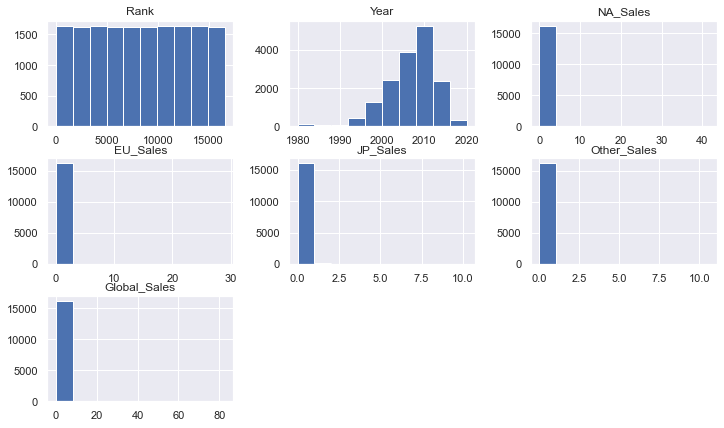

In [114]:
df.hist(figsize=(12,7))

#### The bar chart below shows the value counts of 50 of the largest video game publishers

Text(0, 0.5, 'Number of video games')

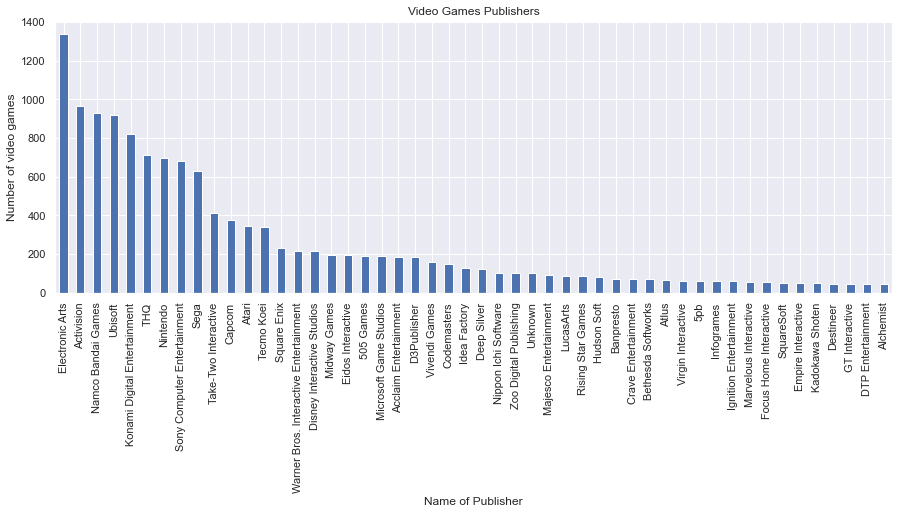

In [112]:
df.Publisher.value_counts().nlargest(50).plot(kind='bar',figsize=(15,5))
plt.title('Video Games Publishers')
plt.xlabel('Name of Publisher')
plt.ylabel('Number of video games')

**The Bar chart below shows the top ten genres in the dataset with 'Action' having the highest number of video games** 

Text(0, 0.5, 'Number of video games')

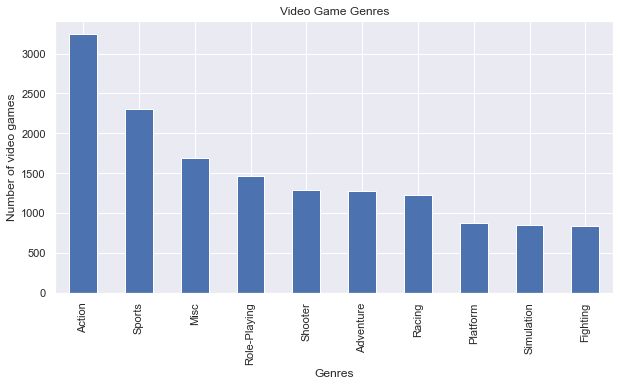

In [120]:
df.Genre.value_counts().nlargest(10).plot(kind='bar',figsize=(10,5))
plt.title('Video Game Genres')
plt.xlabel('Genres')
plt.ylabel('Number of video games')

<AxesSubplot:xlabel='Global_Sales'>

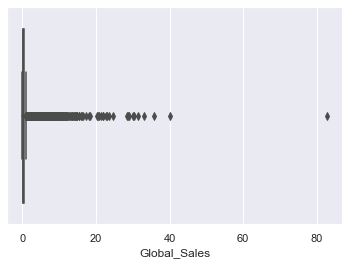

In [121]:
sns.boxplot(x=df['Global_Sales'])

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178027,-0.400315,-0.379137,-0.269323,-0.332735,-0.426975
Year,0.178027,1.000000,-0.091285,0.006108,-0.169387,0.041128,-0.074647
NA_Sales,-0.400315,-0.091285,1.000000,0.768923,0.451283,0.634518,0.941269
EU_Sales,-0.379137,0.006108,0.768923,1.000000,0.436379,0.726256,0.903264
JP_Sales,-0.269323,-0.169387,0.451283,0.436379,1.000000,0.290559,0.612774
Other_Sales,-0.332735,0.041128,0.634518,0.726256,0.290559,1.000000,0.747964
Global_Sales,-0.426975,-0.074647,0.941269,0.903264,0.612774,0.747964,1.000000


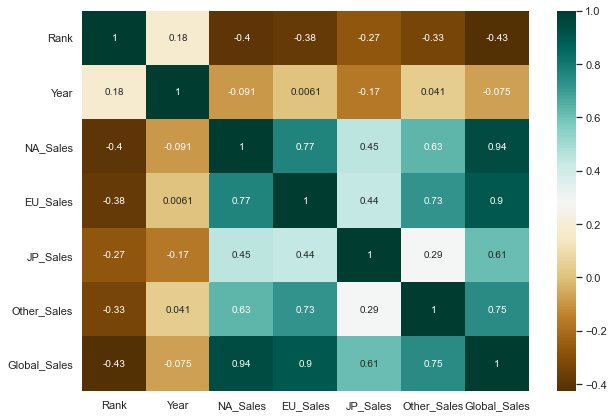

In [115]:
#the correlation between numeric columns in the dataset
plt.figure(figsize=(10,7))
v = df.corr()
sns.heatmap(c, cmap='BrBG',annot=True)
v

<Figure size 2160x4320 with 0 Axes>

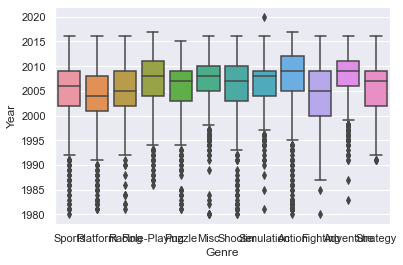

<Figure size 2160x4320 with 0 Axes>

In [77]:
sns.boxplot(x='Genre',y='Year', data=df)
plt.figure(figsize=(30,60))

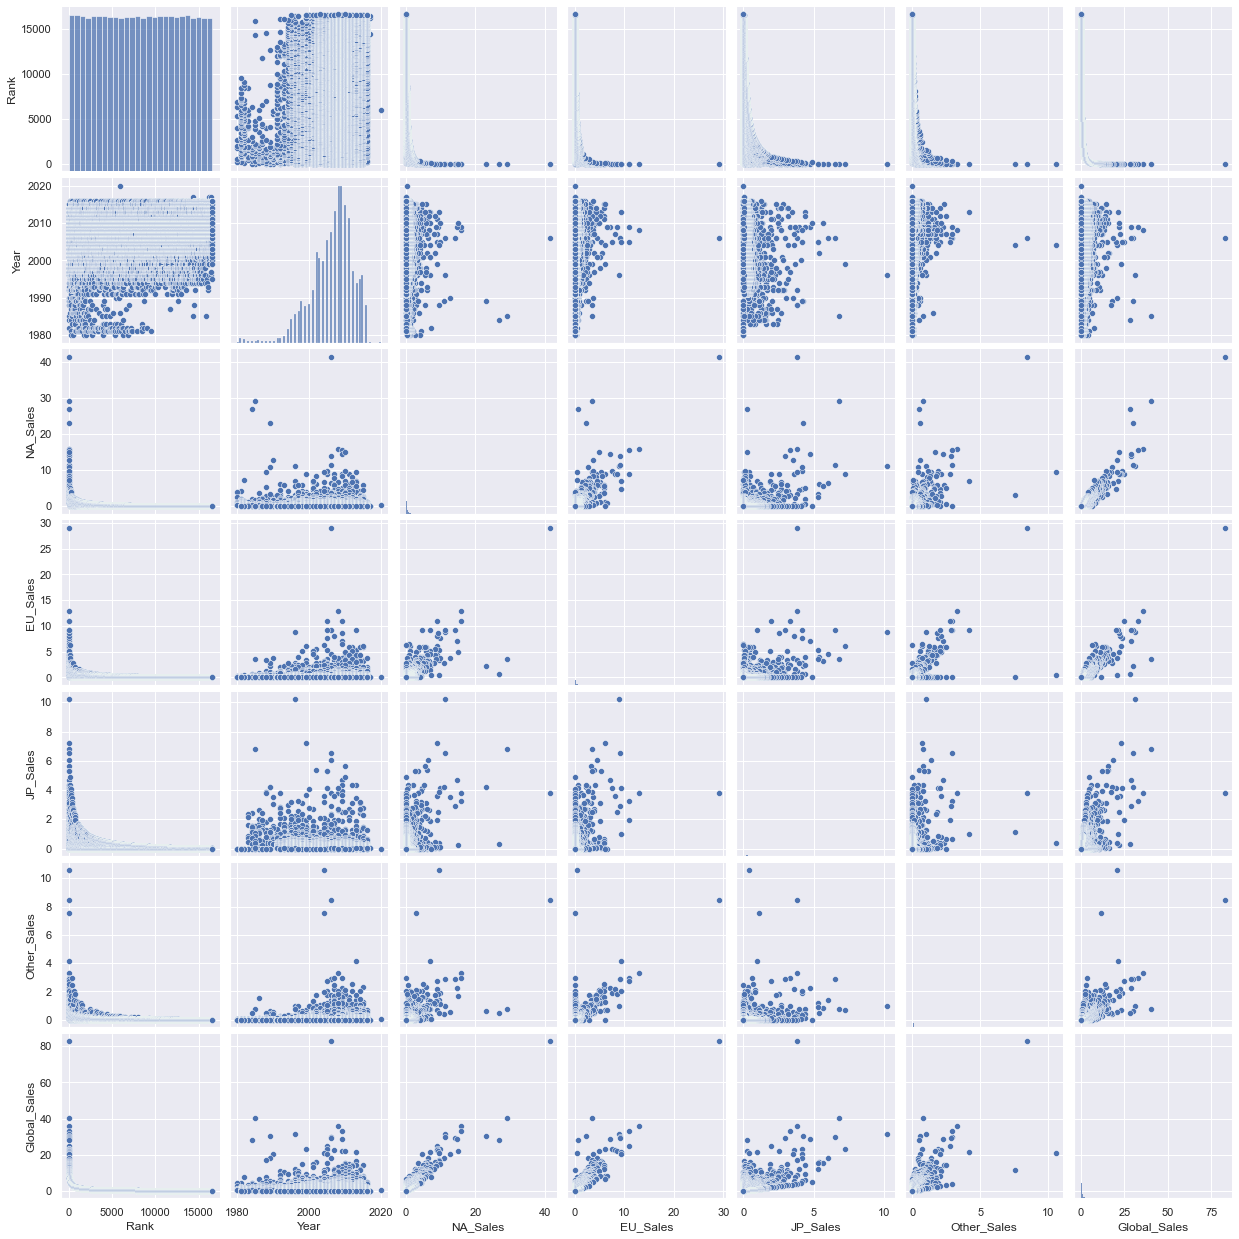

In [117]:
#the relationship between the columns
sns.pairplot(df)

**The Pie chart below just the percentage distribution of Platforms in the Datasets**

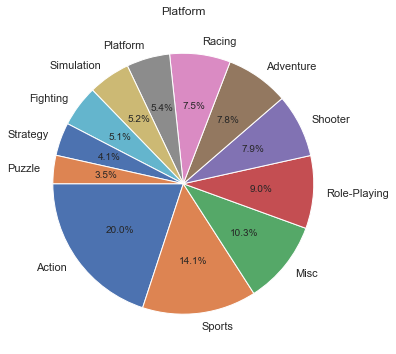

In [136]:
plt.figure(figsize=(12,6))
plt.title('Platform')
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=180);

In [36]:
df['Publisher'].value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Navarre Corp                       1
Panther Software                   1
TalonSoft                          1
Simon & Schuster Interactive       1
Elite                              1
Name: Publisher, Length: 578, dtype: int64

In [75]:
df.Platform.nunique()

31

## Asking and Answering Questions 



**Question 1**

**What is the most popular genre to create a video game under?**

In [122]:
#Count the number of values in each genre
genre_counts = df.Genre.value_counts()
genre_counts

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

From the value counts of each genre, Action is the most popular. When creating a video game it would be best to create one that falls under the Action genre

**Question 2**

**Who is the best choice of Publisher to publish a video game under?**

In [150]:
df.Publisher.value_counts()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
KSS                                1
Navarre Corp                       1
TalonSoft                          1
Simon & Schuster Interactive       1
Elite                              1
Name: Publisher, Length: 576, dtype: int64

In [ ]:
Electronic Arts

**Question 3**

**Which year has the maximum number of Global sales?**

In [139]:
#Groups global sales by year and find the sum
df.groupby('Year')['Global_Sales'].sum()

Year
1980     11.38
1981     35.77
1982     28.86
1983     16.79
1984     50.36
1985     53.94
1986     37.07
1987     21.74
1988     47.22
1989     73.45
1990     49.39
1991     32.23
1992     76.16
1993     45.98
1994     79.17
1995     88.11
1996    199.15
1997    200.98
1998    256.47
1999    251.27
2000    201.56
2001    331.47
2002    395.52
2003    357.85
2004    414.01
2005    458.51
2006    521.04
2007    609.92
2008    678.90
2009    667.30
2010    600.29
2011    515.80
2012    363.49
2013    368.11
2014    337.03
2015    264.44
2016     70.90
2017      0.05
2020      0.29
Name: Global_Sales, dtype: float64

The year 2008 brought in the largest amount of sales globally for any given year. It would be a great idea to analyze the games created that year,its corresponding genres, platforms and publisher to see if they had any impact on the amount of video games sold.

**Question 4**

**Which feature has the highest correlation with Year?**

From the correlation chart above, Other_sales has the highest correlation with year.

**Question 5**

**What Platform has published the highest number of video games?**

In [142]:
df['Platform'].value_counts()

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

DS has platform with the highest number of games with a total of 2131

## Inferences and Conclusion

From the Analysis we can conclude that:
Most Popular Genre: Action
Best choice of Platform: DS
Best choice of Publisher: Electronic Arts
 We can conclude that combining these factors when creating a Video game would ensure maximum sales. Further information can also be gotten by reviewing the trends, styles and other factors from 2008. 

## References and Future Work


Dataset can be found on kaggle at [here](https://www.kaggle.com/gregorut/videogamesales)

Ideas for future projects using this dataset: Create a model to predict success of video games sales.